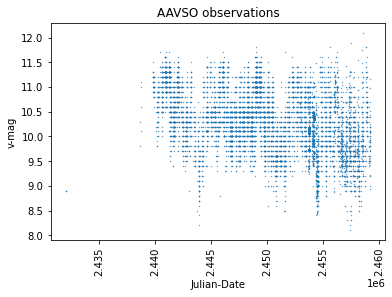

In [ ]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt


# Read in Data 
cqtau_v = open('cqtau_aavso.txt',"r") # imported from AAVSO - https://www.aavso.org/data-download

t = []
v = []

lines = cqtau_v.readlines()
for i in lines[:-2]:
    t.append(i.split(',')[0])
    v.append(i.split(',')[1])



# Fix data. This is temporary. I'd prefer to remove but I still need to figure out how...      
v = [i.replace('<','') for i in v]


 

# Convert strings to floats
t = [float(i) for i in t]
v = [float(i) for i in v]

#plot check
#plt.figure()
plt.scatter(t,v,s=.1)
plt.xticks(rotation=90);
plt.ylabel('v-mag')
plt.xlabel('Julian-Date')
plt.title('AAVSO observations')
plt.show()


from astropy.timeseries import LombScargle
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

t = t * u.day
v = v * u.mag

ls = LombScargle(t, v)
frequency, power = ls.autopower(method = 'slow')#nyquist_factor=2)
print('frequency of max power = ',frequency[np.argmax(power)] )
# tells us that under assumption that there is no periodic signal in the data, 
# we will observe a peak high or higher approximately significance*100 (percent) of the time.
# If low, gives a strong indication that periodic signal present
print('significance of peak', ls.false_alarm_probability(power.max()))

print('length of frequencies',len(frequency), 'min frequency', frequency.min(), 'max frequency = ', frequency.max())

plt.plot(frequency, power)
plt.title('Lomb Scargle Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
print('time units = ', frequency.unit)
print('power units =', power.unit)
#LombScargle.model(t, maxfreq)
#LombScargle.model_parameters(frequency)
